In [152]:
#Imports

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [153]:
def plt_format(image: any) -> any:
    """Function that uses the cvtcolor function from openCV to map the openCV-decoded image (B,G,R) into a regular (R,G,B) format by re-ordering the pixel channels"""
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

* A) Define a universal color table with a maximum of 256 different colors

[(0.0, 0.0, 0.0), (0.0, 0.0, 64.0), (0.0, 0.0, 128.0), (0.0, 0.0, 192.0), (0.0, 32.0, 0.0)]


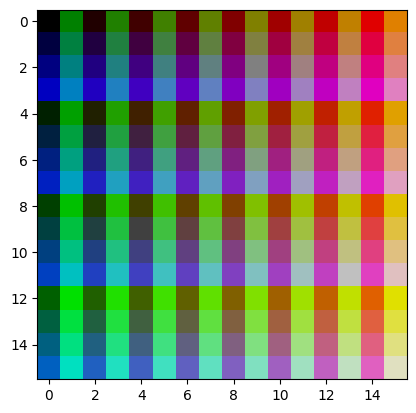

In [154]:
COLORS_NUMBER = 256 #2**8
channels = 3
table_size = int(np.sqrt(COLORS_NUMBER))
colorMatrix = np.zeros((table_size, table_size, channels), np.uint8)
colorTable = []

#Initialize color table
#Say we want to color code in 256 colors - that is, 8 bits
#We can simply assigns (3,3,2) bits for (r,g,b)
#Let's create the table with the combination of every rgb color we can have
index = 0
for r in range(2**3):
    for g in range(2**3):
        for b in range(2**2):
            x = int(index / table_size)
            y = int(index % table_size)
            #Adjust to color space: from 32 colors in a 256-colors space will be spread and not in 0-32
            adjustedColor = (r*(256/2**3), g*(256/2**3), b*(256/2**2))
            colorMatrix[y,x] = adjustedColor
            colorTable.append(adjustedColor)
            index += 1

#Print first 5 pixels
print(colorTable[:5])

#cizualise color table
plt.imshow(colorMatrix)

* (b) Write an algorithm that transforms the initial pixel values with an index to the colortable so that the return image looks as similar as possible to the original image.

In [155]:
MAX_RGB = 2**8
MAX_RG = 2**3
MAX_B = 2**2

def rgb_to_index(x,y,z) -> tuple[int, int, int]:
    """maps an RGB color encoded in the standard (256, 256, 256) notation to its index of the color table encoded in a (8,8,4) world
    This means that from three channels as (8,8,8) bits, we go to 3 channels as (3,3,2) bits, with 2**8 different colors instead of ((2**8)**3)"""
    #get index of the pixel in the (8,8,4) world without the spreading coefficient
    #This means that xindex can be any number between 0-7, but will not be adjusted to the 0-255 plage
    xIndex = np.floor((x / MAX_RGB) * MAX_RG)
    yIndex = np.floor((y / MAX_RGB) * MAX_RG)
    zIndex = np.floor((z / MAX_RGB) * MAX_B)

    #From the x.y.z index, it is easy to compute the index of the color table as we know it has been filled with 
    return int(xIndex*(MAX_RG*MAX_B) + yIndex*MAX_B + zIndex)

#Test the reverse function
colorsToTest = [(64,0,0),(0,64,0), (200,200,200), (220,220,191)]
for color in colorsToTest:
    index = rgb_to_index(*color)
    print(f"Color{color} at index {index} of the color table: table[{index}]={colorTable[index]}")

Color(64, 0, 0) at index 64 of the color table: table[64]=(64.0, 0.0, 0.0)
Color(0, 64, 0) at index 8 of the color table: table[8]=(0.0, 64.0, 0.0)
Color(200, 200, 200) at index 219 of the color table: table[219]=(192.0, 192.0, 192.0)
Color(220, 220, 191) at index 218 of the color table: table[218]=(192.0, 192.0, 128.0)


Load an image in memory and create the associated image with the color map

In [156]:
def work(imageName):
    #Load the image as a 2D array of 3 channels
    image = cv2.imread(f'./in/{imageName}') 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    #Using the previously developped function, map each pixel to its "bucket" representation as an index of the color table
    y,x,z = image.shape
    print(f"Image is {x}*{y} pixels, pixels have {z} channels")

    #Image as a list of index
    imageAsIndexes = np.zeros((x,y), int)
    for i in range(x):
        for j in range(y):
            imageAsIndexes[i, j] = rgb_to_index(*image[i,j])

    startPixels = [f"{image[0,i]} -> {imageAsIndexes[0,i]}" for i in range(10)]

    #Image as in the color table
    colorMapImage = np.zeros(image.shape, np.uint8)
    for i in range(x):
        for j in range(y):
            index = imageAsIndexes[i,j]
            colorMapImage[i, j] = colorTable[index]

    #Display first image and color image
    fig, axes = plt.subplots(1, 3, figsize=(15,15))

    axes[0].imshow(image)
    axes[0].set_title('Original image')
    axes[0].set_axis_off()

    axes[1].imshow(colorMapImage)
    axes[1].set_title('Colormap-transformed image')
    axes[1].set_axis_off()

    axes[2].imshow(colorMatrix)
    axes[2].set_title('Color map')
    axes[2].set_axis_off()

Image is 256*256 pixels, pixels have 3 channels


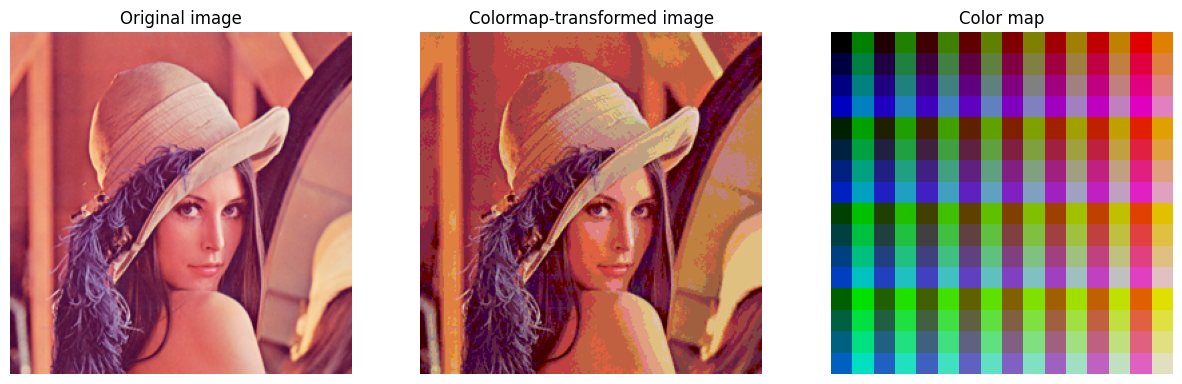

In [157]:
work('lena.png')

Image is 256*256 pixels, pixels have 3 channels


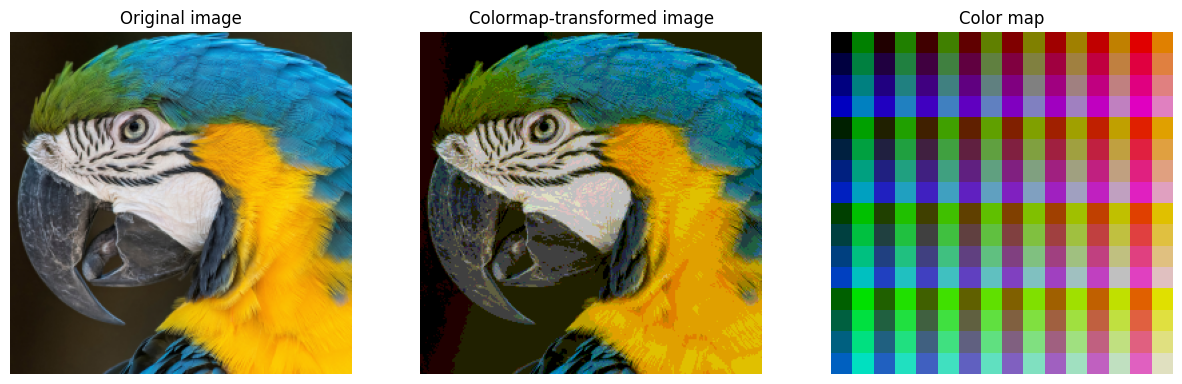

In [158]:
work('ara.png')

In [159]:
for imageName in ["Aeroplane.png", "Baboon.png", "Beetle.png", "Cervin.png"]:
    work(imageName)

SyntaxError: expected ':' (1405496556.py, line 1)